# Entree Chicago recommendation system

    Description of the recommender system
    The system recommends restaurants to the user based on factors such as cuisine, price, style, atmosphere, etc. The user can then provide feedback such as find a nicer or less expensive restaurant.
    The data is in Txt format and organized into files in which each line represents a session of user interaction with the system. The (tab-separated) fields are as follows: Date, IP, EntryPoint, R1, R2, ..., RN, EndPoint R1, R2, ... RN are the rates of the rated restaurants. The dataset can be download from (https://archive.ics.uci.edu/dataset/123/entree+chicago+recommendation+data) for noncommercial use.
    It is suitable for research in Knowledge based and Case-based Recommender Systems. He has also used the dataset in (R. Burke, Knowledge-based recommender systems) to build a domain-independent Casebased Recommender System for on-line information access.
    
    1.	Describe the data available for your recommendation system (users, Items, ratings)
    2.	Give a measure of similarity between restaurants
    3.	Build the similarity table between restaurants
    4.	Give the 3 most similar restaurants between
    5.	Propose a first recommendation system based on similarity
    6.	Compare your recommendation system to existing recommendation system
    7.	Propose an aggregation on restaurant (example – using clustering)
    8.	Propose a second recommendation system based on aggregated restaurant
    9.	Compare your recommendation system to existing recommendation system



## 1. Data available for the reccomendation system is:

    data 	- the data files describing restaurants of various cities and a master feature dictionary.
    restaurant id [tab] restaurant name [tab] restaurant features (3 digits ids separated by spaces)


    session - session data gathered from the use of the Entree system

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Let's load the data for Chicago restaurants

chicago = pd.read_csv('entree/data/chicago.txt', sep = '\t', header = None)

In [4]:
#To load the features we will create a dictionary with the feature codes and the feature names
#The features in the .txt are of the form 000 A, 001 Authentic, 002 Afghanistan, etc.

features = {}

with open('entree/data/features.txt') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) >= 2:
            key = parts[0]
            value = parts[1].strip()
            features[key] = value



In [5]:
features

{'000': 'A',
 '001': 'Authentic',
 '002': 'Afghanistan',
 '003': 'African',
 '004': 'After Hours Dining',
 '005': 'American (Contemporary)',
 '006': 'American (New)',
 '007': 'American (Regional)',
 '008': 'American (Traditional)',
 '009': 'American',
 '010': 'An Historic Spot',
 '011': 'An Out Of The Way Find',
 '012': 'Argentinean',
 '013': 'Armenian',
 '014': 'Asian',
 '015': 'Austrian',
 '016': 'Bakeries',
 '017': 'Bar-B-Q',
 '018': 'Belgian',
 '019': 'Brasserie',
 '020': 'Brazilian',
 '021': 'Buffet Dining',
 '022': 'Burmese',
 '023': 'Burritos',
 '024': 'Business Scene',
 '025': 'Creative',
 '026': 'Cab',
 '027': 'Cafe/Espresso Bars',
 '028': 'Cafe/Garden Dining',
 '029': 'Cafeterias',
 '030': 'Cajun',
 '031': 'Californian',
 '032': 'Cambodian',
 '033': 'Canadian',
 '034': 'Caribbean',
 '035': 'Carry in Wine and Beer',
 '036': 'Catering for Special Events',
 '037': 'Caviar',
 '038': 'Central',
 '039': 'Chinese',
 '040': 'Classic Hotel Dining',
 '041': 'Coffee Houses',
 '042': 'Co

## 2. Give a measure of similarity between the restaurants: We will use Jaccard's distance.

    Jaccard distance is a measure of dissimilarity between two sets. It is often used to compare the similarity between two sets by calculating the size of their intersection divided by the size of their union. The Jaccard distance between sets A and B is defined as:

    Jaccard Distance (A, B) = 1 - (|A ∩ B| / |A ∪ B|)

    Where:

    |A ∩ B| represents the size of the intersection of sets A and B (i.e., the number of elements that are common to both sets).
    |A ∪ B| represents the size of the union of sets A and B (i.e., the total number of unique elements in both sets).
    The Jaccard distance ranges from 0 to 1, where 0 means the sets are identical (no dissimilarity), and 1 means the sets have no elements in common (maximum dissimilarity).

In [6]:
#Rename the columns of the dataframe chicago

chicago.rename(columns={0:'restaurant_id', 1:'restaurant_name', 2:'review'}, inplace=True)
chicago.head()

,restaurant_id,restaurant_name,review
0,0,Moti Mahal,214 035 149 021 117 075 204 051 163
1,1,Village,026 249 174 004 132 249 198 191 192 125 075 20...
2,2,Millrose Brewing Company,137 249 194 215 213 174 249 191 192 008 075 20...
3,3,Dover Straits,137 190 174 249 212 075 205 053 165
4,4,Eat Your Hearts Out,214 249 249 197 111 025 025 112 075 205 053 164


In [7]:
#Lets convert the review column to a list of lists

chicago['review'] = chicago['review'].apply(lambda x: x.split(' '))
chicago.head()

,restaurant_id,restaurant_name,review
0,0,Moti Mahal,"[214, 035, 149, 021, 117, 075, 204, 051, 163]"
1,1,Village,"[026, 249, 174, 004, 132, 249, 198, 191, 192, ..."
2,2,Millrose Brewing Company,"[137, 249, 194, 215, 213, 174, 249, 191, 192, ..."
3,3,Dover Straits,"[137, 190, 174, 249, 212, 075, 205, 053, 165]"
4,4,Eat Your Hearts Out,"[214, 249, 249, 197, 111, 025, 025, 112, 075, ..."


In [8]:
#the column review contains the features of the restaurant in the form of a string, let's split it into a list of features

chicago['review'] = chicago['review'].apply(lambda x: x[0].split() if isinstance(x, list) and len(x) == 1 else x)

In [9]:
chicago.head()

,restaurant_id,restaurant_name,review
0,0,Moti Mahal,"[214, 035, 149, 021, 117, 075, 204, 051, 163]"
1,1,Village,"[026, 249, 174, 004, 132, 249, 198, 191, 192, ..."
2,2,Millrose Brewing Company,"[137, 249, 194, 215, 213, 174, 249, 191, 192, ..."
3,3,Dover Straits,"[137, 190, 174, 249, 212, 075, 205, 053, 165]"
4,4,Eat Your Hearts Out,"[214, 249, 249, 197, 111, 025, 025, 112, 075, ..."


In [10]:
print(type(chicago.loc[0, 'review']))  # This should print <class 'list'>


<class 'list'>


In [11]:
for key in chicago.loc[0, 'review'][:5]:
    if key in features:
        print(f"{key} maps to {features[key]}")
    else:
        print(f"{key} not found in features dictionary")


214 maps to Short Drive
035 maps to Carry in Wine and Beer
149 maps to No Reservations
021 maps to Buffet Dining
117 maps to Indian


In [12]:
sample_review = chicago.loc[0, 'review']
print(type(sample_review))
print(sample_review)


<class 'list'>
['214', '035', '149', '021', '117', '075', '204', '051', '163']


In [13]:
rest_features = pd.DataFrame(0, index=chicago.index, columns=features.values())

#Fill the dataframe rest_features with 1 if the restaurant has the feature
for index, row in chicago.iterrows():
        review_keys = row['review']
        
        for review_key in review_keys:
            feature_name = features.get(review_key, None)
            if feature_name is not None:
                rest_features.loc[index, feature_name] = 1
            else:
                print(f"Key {review_key} not found in features dictionary for restaurant at index {index}.")

rest_features.sum().sort_values(ascending=False)

$15-$30           454
$15-$30           454
$15-$30           454
$15-$30           454
Weekend Brunch    417
                 ... 
Jamaican            0
Kosher              0
Latin               0
Malaysian           0
Yugoslavian         0
Length: 257, dtype: int64

In [14]:
rest_features.head()

,A,Authentic,Afghanistan,African,After Hours Dining,American (Contemporary),American (New),American (Regional),American (Traditional),American,...,Walk,Warm spots by the fire,Weekend Brunch,Weekend Dining,Weekend Jazz Brunch,Weekend Lunch,Wheelchair Access,Wine and Beer,Yogurt Bar,Yugoslavian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
rest_features.shape

(676, 257)

In [15]:
#We see that the features are not very informative, let's see the most common features

rest_features.sum().sort_values(ascending=False).head(10)



$15-$30              454
$15-$30              454
$15-$30              454
$15-$30              454
Weekend Brunch       417
Excellent Service    371
Excellent Food       353
Parking/Valet        328
Good Decor           300
Good Decor           300
dtype: int64

In [16]:
#Now we will calculate the similarity between the feature_id and rest_id using the Jaccard similarity

def jaccard_similarity(set1, set2):
    intersection = len(list(set(set1).intersection(set2)))
    union = (len(set1) + len(set2)) - intersection
    return float(intersection) / union


## 3. Build a similarity table between the restaurants

In [23]:
#Now we will use the product from itertools to calculate the similarity between all the restaurants

from itertools import combinations

#Create a list of all the restaurants
rest_ids = list(chicago['restaurant_id'].unique())

#Create a list of all the features
feature_ids = list(rest_features.columns)

#Create a list of all the combinations of restaurants and features
rest_pairs = list(combinations(rest_ids, 2))


In [25]:
similarity = []

for r1, r2 in rest_pairs:
    f_r1 = chicago[chicago['restaurant_id'] == r1]['review'].values[0]
    f_r2 = chicago[chicago['restaurant_id'] == r2]['review'].values[0]

    score = jaccard_similarity(f_r1, f_r2)
    similarity.append((r1, r2, score))

similarity_df = pd.DataFrame(similarity, columns=['restaurant_id_1', 'restaurant_id_2', 'similarity'])

In [26]:
similarity_df.head()

,restaurant_id_1,restaurant_id_2,similarity
0,0,1,0.045455
1,0,2,0.045455
2,0,3,0.058824
3,0,4,0.105263
4,0,5,0.166667


C:\Users\ragib_rridy9t\AppData\Local\Temp\ipykernel_19412\998992915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(similarity_df['similarity'], bins=30)


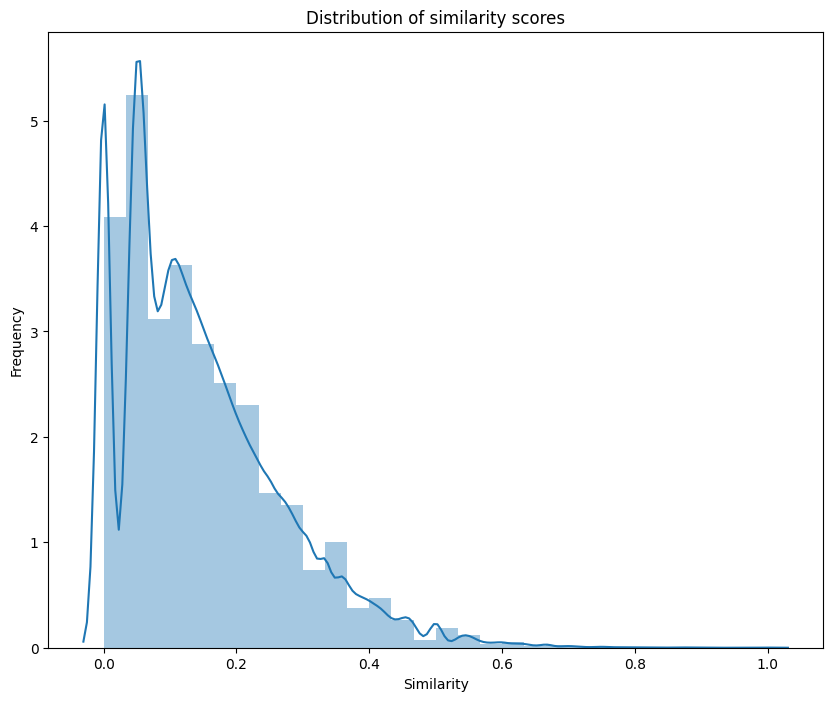

In [27]:
#Lets plot the distribution of the similarity scores

plt.figure(figsize=(10, 8))
sns.distplot(similarity_df['similarity'], bins=30)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of similarity scores')
plt.show()

## 4. Give the 3 most similar restaurants 

In [28]:
#Let's see the most similar restaurants

similarity_df.sort_values(by='similarity', ascending=False).head(10)

,restaurant_id_1,restaurant_id_2,similarity
194868,417,547,1.000000
110520,190,416,1.000000
10026,15,22,1.000000
152992,287,596,1.000000
29820,45,481,1.000000
45599,71,231,1.000000
38305,59,251,1.000000
27589,42,143,1.000000
121531,213,548,0.900000
144625,266,587,0.888889


In [29]:
#We will print the names of the restaurants with the most similar features

for index, row in similarity_df.sort_values(by='similarity', ascending=False).head(10).iterrows():
    r1 = chicago[chicago['restaurant_id'] == row['restaurant_id_1']]['restaurant_name'].values[0]
    r2 = chicago[chicago['restaurant_id'] == row['restaurant_id_2']]['restaurant_name'].values[0]
    print(f"Restaurants {r1} and {r2} have a similarity score of {row['similarity']}")

    

Restaurants Charlie Chiang and Dragon Inn have a similarity score of 1.0
Restaurants La Bella Pasteria and Capriccio's have a similarity score of 1.0
Restaurants Rim Klong and Bangkok Star have a similarity score of 1.0
Restaurants Sai Cafe and Kyoto Japanese Restaurant have a similarity score of 1.0
Restaurants Shilla and Bando have a similarity score of 1.0
Restaurants Happi Sushi and Itto Sushi have a similarity score of 1.0
Restaurants Ha Mien and Nhu Hoa Cafe have a similarity score of 1.0
Restaurants Jia's and Moon Palace have a similarity score of 1.0
Restaurants Sabatino's and Monastero's have a similarity score of 0.9
Restaurants Via Veneto and Alex's Washington Gardens have a similarity score of 0.8888888888888888


C:\Users\ragib_rridy9t\AppData\Local\Temp\ipykernel_19412\1530598850.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(similarity_df['similarity'], bins=10)


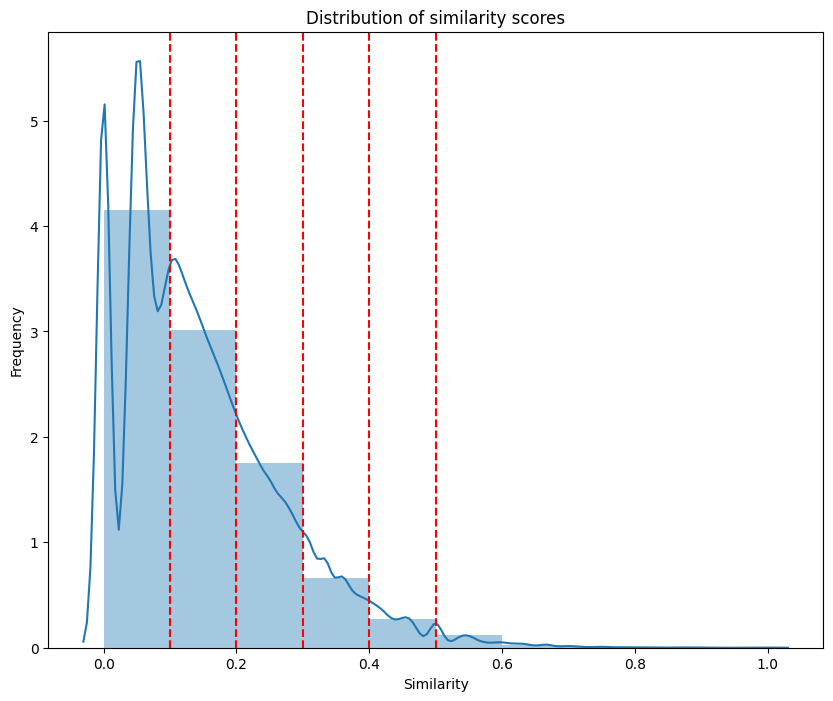

In [37]:
#We will now make plot for the bins of the similarity scores

plt.figure(figsize=(10, 8))
sns.distplot(similarity_df['similarity'], bins=10)
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of similarity scores')
plt.axvline(x=0.1, color='red', linestyle='--')
plt.axvline(x=0.2, color='red', linestyle='--')
plt.axvline(x=0.3, color='red', linestyle='--')
plt.axvline(x=0.4, color='red', linestyle='--')
plt.axvline(x=0.5, color='red', linestyle='--')
plt.show()

## 5. Propose a first recommendation system based on similarity

    We will create a function that takes a restaurant_id and returns the most similar restaurants and list the common features between the restaurants with their similarity score.

In [45]:
#To propose a first reccomendation system we will use the similarity scores to find the most similar restaurants

def get_similar_restaurants(rest_id, similarity_df, n=5):
    similar_restaurants = similarity_df[similarity_df['restaurant_id_1'] == rest_id].sort_values(by='similarity', ascending=False).head(n)
    similar_restaurants = similar_restaurants.merge(chicago, left_on='restaurant_id_2', right_on='restaurant_id')
    similar_restaurants = similar_restaurants[['restaurant_id_1', 'restaurant_id_2', 'similarity', 'restaurant_name', 'review']]
    return similar_restaurants

#Let's test the function with the restaurant_id 0

get_similar_restaurants(7, similarity_df)

,restaurant_id_1,restaurant_id_2,similarity,restaurant_name,review
0,7,80,0.538462,El Tipico,"[214, 004, 132, 249, 149, 142, 075, 205, 052, ..."
1,7,109,0.533333,Mi Casa Su Casa,"[214, 004, 132, 249, 198, 191, 192, 063, 142, ..."
2,7,143,0.500000,Moon Palace,"[214, 249, 198, 039, 075, 205, 052, 164]"
3,7,42,0.500000,Jia's,"[214, 249, 198, 039, 075, 205, 052, 164]"
4,7,311,0.500000,Emperor's Choice,"[214, 004, 132, 039, 076, 205, 052, 164]"


## 6. Compare your recommendation system to existing recommendation system

In [81]:
#Lets extract the session file and check our reccomendation system
import os

folder_path_session = os.path.join('entree', 'session')

# Function to process a line from the session file and extract relevant data
def process_line(line):
    # Splitting the line into parts using tab as separator
    parts = line.strip().split('\t')
    
    # Extracting various components
    date = parts[0]
    ip = parts[1]
    entry_point = parts[2]
    # All elements from the 3rd to the 2nd last are rated restaurants
    rated_restaurants = parts[3:-1]
    # The last element is the end point
    end_point = parts[-1] if parts[-1] != '' else None  # Handling empty end points
    
    return date, ip, entry_point, rated_restaurants, end_point

# Loop over all files in the session folder that start with session
all_lines = []
for file_name in os.listdir(folder_path_session):
    if file_name.startswith('session'):
        # Reading all lines from the session file
        with open(os.path.join(folder_path_session, file_name), 'r') as file:
            lines = file.readlines()

        # adding all lines to the list of all lines
        all_lines.extend(lines)



# Processing all lines and creating a DataFrame
data = [process_line(line) for line in all_lines]
columns = ['Date', 'IP', 'Entry point', 'Rated restaurants', 'End point']
session_data = pd.DataFrame(data, columns=columns)

# Displaying the first few rows of the DataFrame
print('Number of rows:', len(session_data))
session_data.head()


Number of rows: 50672


,Date,IP,Entry point,Rated restaurants,End point
0,07/Sep/1996:12:17:05,www-c09.proxy.gnn.com,0,"[560L, 110L]",110
1,07/Sep/1996:12:21:57,foley.ripco.com,0,"[423L, 77L]",77
2,07/Sep/1996:12:23:36,foley.ripco.com,0,"[633N, 633N, 159P, 159P]",475
3,07/Sep/1996:12:25:14,foley.ripco.com,0,"[441L, 537L]",537
4,07/Sep/1996:15:18:38,pslip103d.egr-ri.ids.net,0,"[90M, 90M, 76L, 476L]",476


### Data Structure:
- The data is organized into files that span roughly a quarter year.
- Each line in a session file represents a session of user interaction with the system.
- The fields in the session file are tab-separated and structured as follows:
    ```
    Date, IP, Entry point, Rated restaurant1, ..., Rated restaurantN, End point
    ```
### Field Semantics:
1. **Date**: The date of the session.
2. **IP**: The IP address of the user.
3. **Entry point**: 
   - Users can use a restaurant from any city as an entry point, but always get recommendations for Chicago restaurants.
   - Form: `nnnX`, where `nnn` is a numeric restaurant ID and `X` is a character A-H encoding the city.
   - City codes:
        - A = Atlanta
        - B = Boston
        - C = Chicago
        - D = Los Angeles
        - E = New Orleans
        - F = New York
        - G = San Francisco
        - H = Washington DC
   - If the entry point is not known (e.g., the user entered selection criteria via a form), it is denoted by a `0`.
4. **Rated Restaurant**:
   - All are Chicago restaurants.
   - Form: `nnnX`, where `nnn` is a numeric restaurant ID and `X` is a character L-T encoding the navigation operation.
   - Navigation codes:
        - L = browse
        - M = cheaper
        - N = nicer
        - O = closer  (unused in the production version of the system)
        - P = more traditional
        - Q = more creative
        - R = more lively
        - S = quieter
        - T = change cuisine (the desired cuisine is not recorded)
5. **End point**:
   - Just the numeric id for the Chicago restaurant that the user saw last.
   - It's assumed to be a good suggestion, but the user might have just given up.
   - Some sessions don't have a known endpoint, marked by `-1`.

In [93]:
#From the session_data we will check the rated restaurants list and extract the restaurant_id that was rated and recommended to the user

def get_original_restaurant_id(rated_restaurants):
    if len(rated_restaurants) > 0:
        original_restaurant_id = rated_restaurants[0].split('_')[0]
        recommended_restaurant_id = rated_restaurants[-1].split('_')[0]
        if original_restaurant_id != recommended_restaurant_id:
            return recommended_restaurant_id
        else:
            return None
    else:
        return None
    
session_data['Recommend_restaurant_id'] = session_data['Rated restaurants'].apply(get_original_restaurant_id)
session_data.head()


,Date,IP,Entry point,Rated restaurants,End point,Original_rest_rating,Recommend_restaurant_id
0,07/Sep/1996:12:17:05,www-c09.proxy.gnn.com,0,"[560L, 110L]",110,L,110L
1,07/Sep/1996:12:21:57,foley.ripco.com,0,"[423L, 77L]",77,L,77L
2,07/Sep/1996:12:23:36,foley.ripco.com,0,"[633N, 633N, 159P, 159P]",475,N,159P
3,07/Sep/1996:12:25:14,foley.ripco.com,0,"[441L, 537L]",537,L,537L
4,07/Sep/1996:15:18:38,pslip103d.egr-ri.ids.net,0,"[90M, 90M, 76L, 476L]",476,M,476L


In [99]:
#Now we will get the recommended restaurants for a restaurant ID that the user inputs to the function,
# to show the reccoemnded restaurants and the ratings associated with them from the session data file

def get_recommended_restaurants(rest_id, session_data):
    recommended_restaurants = session_data[session_data['End point'] == str(rest_id)]
    recommended_restaurants = recommended_restaurants[['Recommend_restaurant_id']]
    return recommended_restaurants

get_recommended_restaurants(7, session_data)


,Recommend_restaurant_id
1869,None
2356,None
3154,None
10245,666L
10885,None
17513,None
18472,None
20252,305L
22588,7L
22595,7L


Note: We see that the if the original rating of the restaurant 7 is L meaning (still browsing) then the reccomendation system has shown the restaurants with ID: 666, 480, 215, 510 and 305 with similar rating that is L.

Whereas our initial reccomendation system: 80 , 109, 143, 42, 311	(El Tipico, Mi Casa Su Casa, Moon Palace,	Jia's)	
		

## 7.	Propose an aggregation on restaurant (example – using clustering)

c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

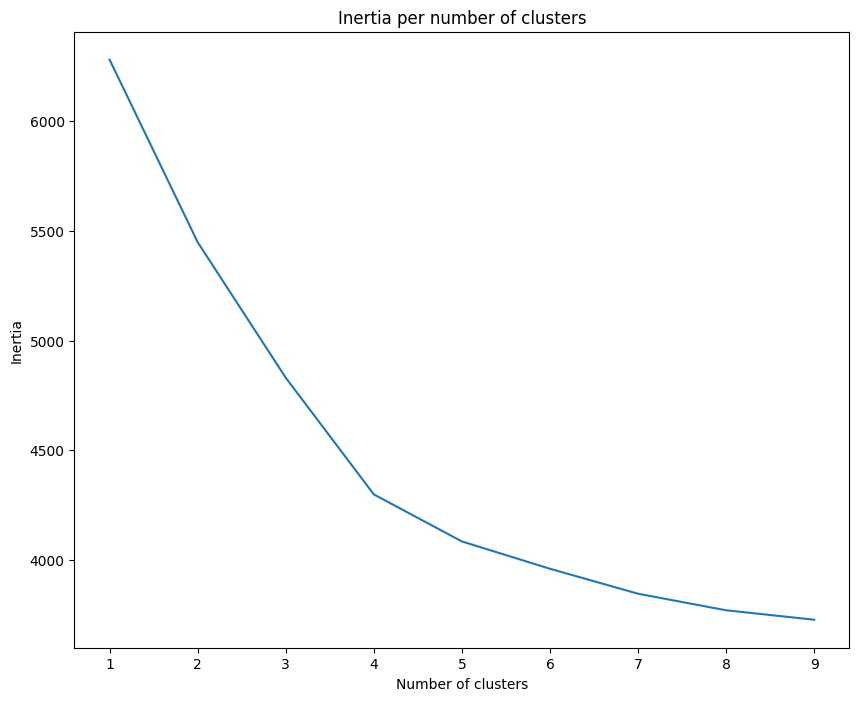

In [46]:
#We will now implement clustering the restaurants that have the same similarity score into a cluster and then re write the function to get the similar restaurants based on the cluster

from sklearn.cluster import KMeans

#We will use the elbow method to find the optimal number of clusters

inertia = []

for k in range(1, 10):
    KMeans_model = KMeans(n_clusters=k, random_state=42)
    KMeans_model.fit(rest_features)
    inertia.append(KMeans_model.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia per number of clusters')
plt.show()


Note: From the plot we see that the optimal number of clusters is 3

In [48]:
#So now we will make 3 clusters and then we will use the function to get the similar restaurants

KMeans_model = KMeans(n_clusters=5, random_state=42)
KMeans_model.fit(rest_features)
rest_features['cluster'] = KMeans_model.labels_

rest_features.head()

c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,A,Authentic,Afghanistan,African,After Hours Dining,American (Contemporary),American (New),American (Regional),American (Traditional),American,...,Warm spots by the fire,Weekend Brunch,Weekend Dining,Weekend Jazz Brunch,Weekend Lunch,Wheelchair Access,Wine and Beer,Yogurt Bar,Yugoslavian,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [49]:
#Let's see the number of restaurants in each cluster

rest_features['cluster'].value_counts()

1    217
0    145
3    124
2    113
4     77
Name: cluster, dtype: int64

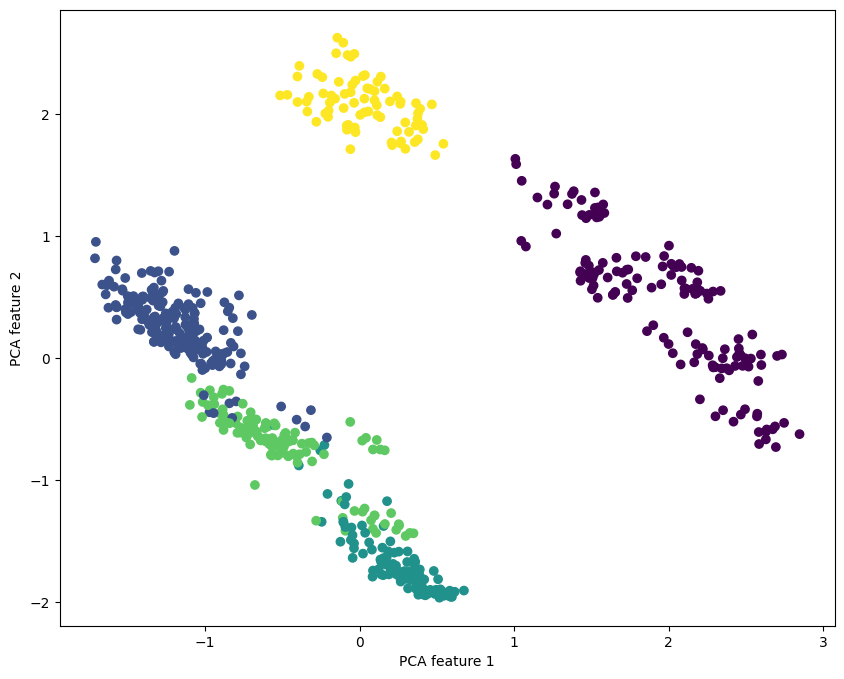

In [52]:
#Visualize the clusters

from sklearn.decomposition import PCA

pca_model = PCA(n_components=2, random_state=42)
pca_model.fit(rest_features.drop(columns=['cluster']))

pca_features = pca_model.transform(rest_features.drop(columns=['cluster']))

plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=rest_features['cluster'])
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')

plt.show()



In [55]:
#Lets see the common features in each cluster

print("Features in Cluster 0", rest_features[rest_features['cluster'] == 0].sum().sort_values(ascending=False).head(10))



Features in Cluster 0 below $15         145
below $15         145
below $15         145
Weekend Brunch     93
Excellent Food     89
Good Service       83
Good Service       83
Short Drive        78
Good Decor         76
Good Decor         76
dtype: int64


In [56]:
print("Features in Cluster 1", rest_features[rest_features['cluster'] == 1].sum().sort_values(ascending=False).head(10))


Features in Cluster 1 cluster              217
$15-$30              217
$15-$30              217
$15-$30              217
$15-$30              217
Excellent Service    187
Excellent Decor      182
Weekend Brunch       161
Excellent Food       148
Parking/Valet        134
dtype: int64


In [61]:
print("Features in Cluster 2", rest_features[rest_features['cluster'] == 2].sum().sort_values(ascending=False).head(10))


Features in Cluster 2 cluster         226
$15-$30         113
Good Service    113
Good Food       113
Good Food       113
Good Service    113
$15-$30         113
$15-$30         113
$15-$30         113
Good Decor      107
dtype: int64


In [58]:
print("Features in Cluster 3", rest_features[rest_features['cluster'] == 3].sum().sort_values(ascending=False).head(10))


Features in Cluster 3 cluster              372
$15-$30              124
$15-$30              124
$15-$30              124
$15-$30              124
Good Decor           117
Good Decor           117
Excellent Food        98
Excellent Service     98
Weekend Brunch        78
dtype: int64


In [59]:
print("Features in Cluster 4", rest_features[rest_features['cluster'] == 4].sum().sort_values(ascending=False).head(10))


Features in Cluster 4 cluster                      308
$30-$50                       70
$30-$50                       70
Parking/Valet                 60
Extraordinary Decor           46
Cab                           45
Extraordinary Food            44
Private Rooms Available       44
Private Parties               44
Good Out of Town Business     44
dtype: int64


## 8. Propose a second recommendation system based on aggregated restaurant

In [65]:
#We will create a list with the restaurant ids and the cluster they belong to

rest_cluster = list(zip(rest_ids, KMeans_model.labels_))
rest_cluster[:10]

[(0, 0),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 0),
 (6, 2),
 (7, 3),
 (8, 0),
 (9, 3)]

In [71]:
#Now we will create a function to get the similar restaurants based on the cluster

def get_sim_cluster(rest_id, rest_cluster, similarity_df, n=20):
    rest_cluster_id = [cluster for rest, cluster in rest_cluster if rest == rest_id][0]
    similar_restaurants = similarity_df[similarity_df['restaurant_id_1'] == rest_id].sort_values(by='similarity', ascending=False).head(n)
    similar_restaurants = similar_restaurants.merge(chicago, left_on='restaurant_id_2', right_on='restaurant_id')
    similar_restaurants = similar_restaurants[['restaurant_id_1', 'restaurant_id_2', 'similarity', 'restaurant_name', 'review']]
    similar_restaurants['cluster'] = rest_cluster_id
    return similar_restaurants


In [72]:
#Let's test the function with the restaurant_id 192

get_sim_cluster(455, rest_cluster, similarity_df)

,restaurant_id_1,restaurant_id_2,similarity,restaurant_name,review,cluster
0,455,540,0.666667,Machu Picchu,"[214, 035, 180, 078, 208, 056, 170]",2
1,455,549,0.666667,Ambassador Caffe,"[214, 035, 048, 078, 208, 056, 170]",2
2,455,651,0.555556,Rada's Inn,"[214, 067, 078, 208, 056, 170]",2
3,455,557,0.500000,Poul Zakopane Harnas,"[214, 045, 186, 078, 208, 056, 170]",2
4,455,490,0.454545,El Nandu,"[214, 059, 231, 012, 078, 208, 056, 170]",2
5,455,637,0.428571,D'Agostino's Cafe & Bar,"[214, 174, 100, 086, 249, 198, 125, 182, 078, ...",2
6,455,526,0.416667,Gino's Steak House,"[137, 174, 198, 024, 225, 078, 208, 056, 170]",2
7,455,470,0.416667,Clara's Pasta di Casa,"[137, 174, 198, 149, 125, 078, 208, 056, 170]",2
8,455,492,0.384615,Pomodori,"[214, 174, 249, 196, 242, 125, 078, 208, 056, ...",2
9,455,499,0.363636,Piatti Verde,"[026, 125, 243, 078, 208, 056, 170]",2


c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

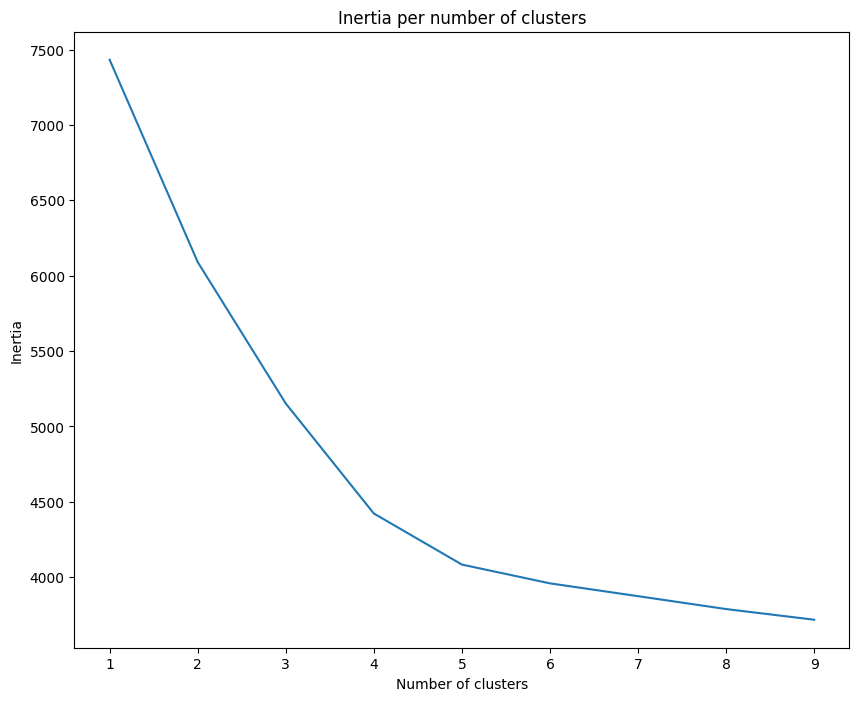

In [73]:
#Lets iterate the clusters again to see if we can find a better number of clusters

inertia = []

for k in range(1, 10):
    KMeans_model = KMeans(n_clusters=k, random_state=42)
    KMeans_model.fit(rest_features)
    inertia.append(KMeans_model.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia per number of clusters')
plt.show()

In [74]:
#As per the graph, we will use 4 clusters

KMeans_model = KMeans(n_clusters=4, random_state=42)
KMeans_model.fit(rest_features)

rest_features['cluster'] = KMeans_model.labels_

rest_features.head()

c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,A,Authentic,Afghanistan,African,After Hours Dining,American (Contemporary),American (New),American (Regional),American (Traditional),American,...,Warm spots by the fire,Weekend Brunch,Weekend Dining,Weekend Jazz Brunch,Weekend Lunch,Wheelchair Access,Wine and Beer,Yogurt Bar,Yugoslavian,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [75]:
#Lets see the number of restaurants in each cluster

rest_features['cluster'].value_counts()

1    237
2    217
0    145
3     77
Name: cluster, dtype: int64

In [77]:
#Lets visualize the clusters

import plotly.graph_objects as go


pca_iter = PCA(n_components=2, random_state=42)
pca_iter.fit(rest_features.drop(columns=['cluster']))

pca_features = pca_iter.transform(rest_features.drop(columns=['cluster']))

fig = go.Figure(go.Scatter(x=pca_features[:, 0], y=pca_features[:, 1], mode='markers', marker=dict(color=rest_features['cluster'])))
fig.update_layout(title='Clusters of restaurants', xaxis_title='PCA feature 1', yaxis_title='PCA feature 2', showlegend=True)
fig.show()

In [78]:
get_sim_cluster(455, rest_cluster, similarity_df)

,restaurant_id_1,restaurant_id_2,similarity,restaurant_name,review,cluster
0,455,540,0.666667,Machu Picchu,"[214, 035, 180, 078, 208, 056, 170]",2
1,455,549,0.666667,Ambassador Caffe,"[214, 035, 048, 078, 208, 056, 170]",2
2,455,651,0.555556,Rada's Inn,"[214, 067, 078, 208, 056, 170]",2
3,455,557,0.500000,Poul Zakopane Harnas,"[214, 045, 186, 078, 208, 056, 170]",2
4,455,490,0.454545,El Nandu,"[214, 059, 231, 012, 078, 208, 056, 170]",2
5,455,637,0.428571,D'Agostino's Cafe & Bar,"[214, 174, 100, 086, 249, 198, 125, 182, 078, ...",2
6,455,526,0.416667,Gino's Steak House,"[137, 174, 198, 024, 225, 078, 208, 056, 170]",2
7,455,470,0.416667,Clara's Pasta di Casa,"[137, 174, 198, 149, 125, 078, 208, 056, 170]",2
8,455,492,0.384615,Pomodori,"[214, 174, 249, 196, 242, 125, 078, 208, 056, ...",2
9,455,499,0.363636,Piatti Verde,"[026, 125, 243, 078, 208, 056, 170]",2


In [100]:
get_sim_cluster(7, rest_cluster, similarity_df)

,restaurant_id_1,restaurant_id_2,similarity,restaurant_name,review,cluster
0,7,80,0.538462,El Tipico,"[214, 004, 132, 249, 149, 142, 075, 205, 052, ...",3
1,7,109,0.533333,Mi Casa Su Casa,"[214, 004, 132, 249, 198, 191, 192, 063, 142, ...",3
2,7,143,0.500000,Moon Palace,"[214, 249, 198, 039, 075, 205, 052, 164]",3
3,7,42,0.500000,Jia's,"[214, 249, 198, 039, 075, 205, 052, 164]",3
4,7,311,0.500000,Emperor's Choice,"[214, 004, 132, 039, 076, 205, 052, 164]",3
5,7,134,0.470588,Leona's Neighborhood Place,"[214, 249, 004, 132, 100, 086, 198, 191, 192, ...",3
6,7,388,0.461538,Slice of Life,"[214, 004, 132, 198, 129, 074, 204, 052, 163]",3
7,7,291,0.437500,La Canasta,"[214, 249, 174, 004, 132, 100, 086, 229, 234, ...",3
8,7,641,0.416667,Babaluci,"[214, 249, 125, 074, 204, 052, 164]",3
9,7,316,0.416667,Zasu,"[214, 253, 068, 074, 205, 052, 164]",3


Note: 
    All restaurants, including the reference one, belong to cluster 3. This suggests that the clustering algorithm has grouped these restaurants together based on certain shared characteristics, which could be related to cuisine, ambiance, price range, or other factors.

    Reviews: Each restaurant has a list of reviews, represented by what seems to be review IDs. Some restaurants share common reviews, which might be contributing to their similarity scores. For instance, both "Moon Palace" and "Jia's" share the exact same list of reviews.

    Conclusion:
    The reference restaurant (with restaurant_id of 7) has been compared with various other restaurants based on a similarity metric. The most similar restaurant to it is "El Tipico" with a similarity score of approximately 0.54.

    The review data indicates that some restaurants have shared reviews, which could be a factor in determining their similarity. However, to make more detailed conclusions about the nature of these similarities, we'd need more information about the reviews and the factors considered in the clustering and similarity calculations.

## 9. Compare your recommendation system to existing recommendation system

#### Restaurant Clustering:
    -Data: We're using restaurant details and user activity data.
    -Method: We group similar restaurants together and then suggest them based on what users like and the restaurant's features.
    -Benefits: This way might be faster when suggesting because we're looking at groups of restaurants, not each one separately. It gives general suggestions which might be okay when we don't need to be very specific.
    -Comparing the Two Systems:
    -Handling Lots of Data: The new system might work better when there are many restaurants because of the grouping.
    -Tailored Suggestions: The original system might give more specific suggestions since it looks at each restaurant's details.
    -Speed and Effort: The original system might be simpler and faster if it just suggests based on what users like without considering         restaurant details.
    -Important Points:
    -How Good Are the Suggestions?: We need to test how accurate both systems are in suggesting restaurants users will like.
    -Variety and Surprise: Sometimes, suggesting unexpected or varied restaurants can make users happier, even if it's not the "perfect" match.
    -Feedback from Users: It's important to see if users actually like the suggestions by asking them or testing different versions.